In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# Defining the number of rows and columns to be visible
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)

# Defining plot style
plt.style.use('ggplot')

# 1. Importing Data

In [2]:
bank_customer_df = pd.read_csv('data/churn-modelling.zip')

display(bank_customer_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Given:**

* Here, the target column is `Exited`
* The value in the `Exited` column can either be `0` or `1`  
    
    * Where `0` signifies that the customer is retained
    
    * and `1` signifies that customer exited the bank

## 1.1 Inspecting data shape

In [3]:
bank_customer_df.shape

(10000, 14)

**Observation:** There are 10000 rows and 14 columns in the data

## 1.2 Checking the data type of columns and null values (if exists)

In [4]:
bank_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observation:** The data type associated with every columns are all correct.

# 2. Getting the unique value count of every column

### Following things will be inferred:


#### a. Columns that can be dropped directly

* Columns that have only unique value

* Columns that have only a single value


#### b. Specification of the collected data

In [5]:
def print_unique_count(df):
    df_columns = df.columns
    
    for col in df_columns:
        print(col, df[col].nunique())

In [6]:
print_unique_count(bank_customer_df)

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


**Observation:**

* The collected data is of 10000 customers
* `RowNumber` and `CustomerId` columns need to be dropped since they are all unique values.
* The data is collected from 3 different geographies of different age groups.

## 2.1 Dropping the columns

In [7]:
bank_customer_df = bank_customer_df.drop(columns=['RowNumber', 'CustomerId'])

# 3. Descriptive Analysis

**Columns to work upon**

In [8]:
display(bank_customer_df.columns.tolist())

['Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

## 3.1 Univariate Analysis

### 3.1.1 Countries participated in the survey

In [9]:
display(bank_customer_df['Geography'].unique().tolist())

['France', 'Spain', 'Germany']

So, we have the data from three different countries i.e. **France, Spain and Germany**.

### 3.1.2 What is the distribution of the countries in the data?

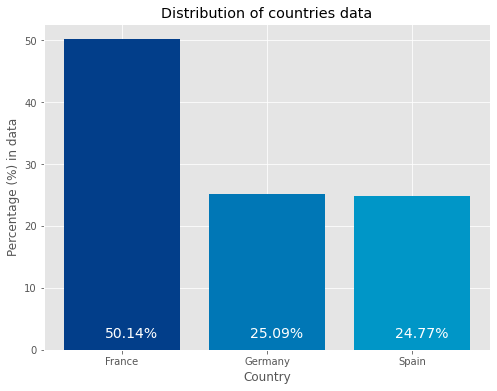

In [10]:
geography_count = bank_customer_df['Geography'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.bar(geography_count.index, geography_count.values*100, 
        color=['#023E8A', '#0077B6', '#0096C7'])

for i, val in enumerate(geography_count.values*100):
    plt.annotate('{}%'.format(round(val, 2)), xy=(0, 0), xytext=(-0.12+i, 2),
             fontsize=14, color='#FFFFFF')

plt.xlabel('Country')
plt.ylabel('Percentage (%) in data')
plt.title('Distribution of countries data')

plt.show()

**Observation:** The majority of the data is collected from **France**.

### 3.1.3 Distribution of Churn

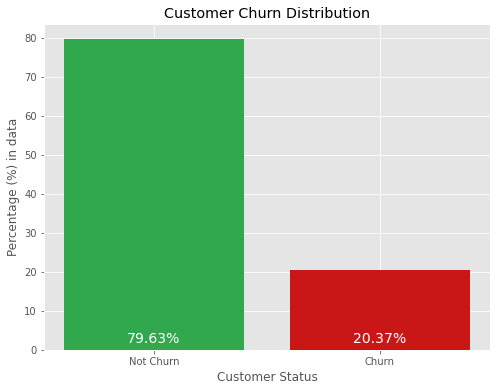

In [11]:
churn_count = bank_customer_df['Exited'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
plt.bar(churn_count.index, churn_count.values*100, 
        color=['#32a84e', '#c91616'])

for i, val in enumerate(churn_count.values*100):
    plt.annotate('{}%'.format(round(val, 2)), xy=(0, 0), xytext=(-0.12+i, 2),
             fontsize=14, color='#FFFFFF')

plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.xlabel('Customer Status')
plt.ylabel('Percentage (%) in data')
plt.title('Customer Churn Distribution')

plt.show()